In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Load arrays from text files
N = np.loadtxt('N.txt')
tps = np.loadtxt('tps.txt')
PE = np.loadtxt('PE.txt')
timesteps = np.loadtxt('timesteps.txt')
densities = np.loadtxt('densities.txt')
dts = np.loadtxt('dts.txt')
lj = np.loadtxt('lj.txt')

In [2]:
print(N)

300.0


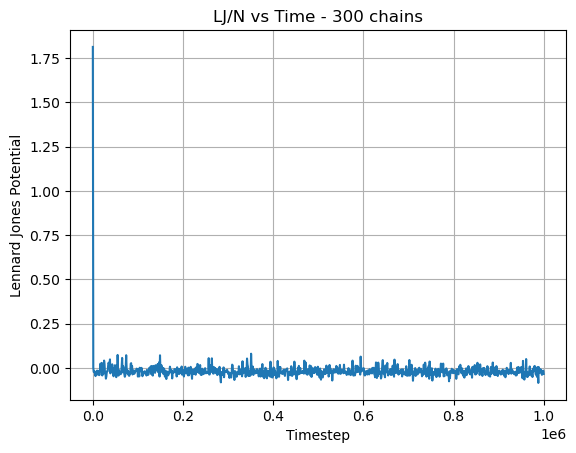

In [3]:
plt.plot(timesteps, lj/N)
plt.xlabel("Timestep")
plt.ylabel("Lennard Jones Potential")
plt.title("LJ/N vs Time - 300 chains")
plt.grid(True)
plt.show()

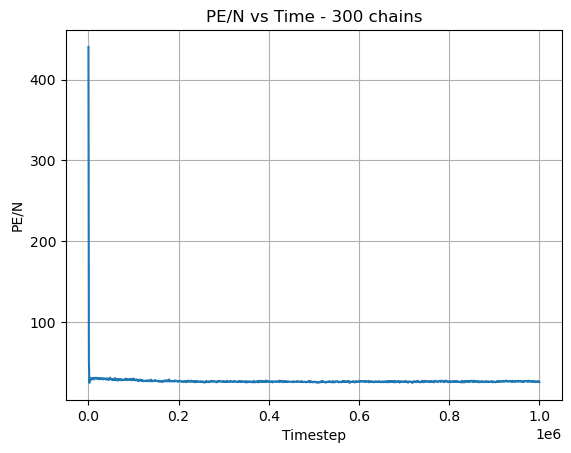

In [4]:
plt.plot(timesteps, PE/N)
plt.xlabel("Timestep")
plt.ylabel("PE/N")
plt.title("PE/N vs Time - 300 chains")
plt.grid(True)
plt.show()

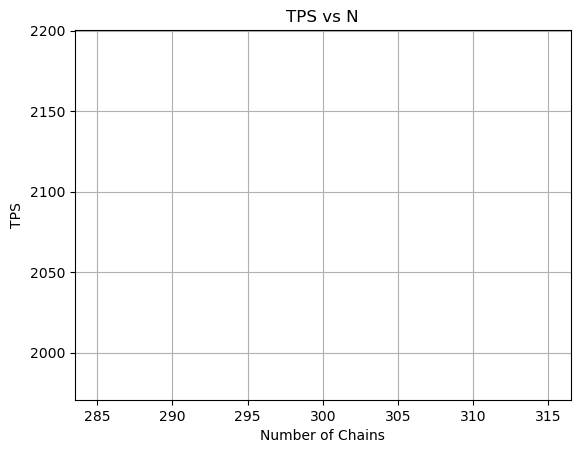

In [5]:
plt.plot(N, tps)
plt.xlabel("Number of Chains")
plt.ylabel("TPS")
plt.title("TPS vs N")
plt.grid(True)
plt.show()

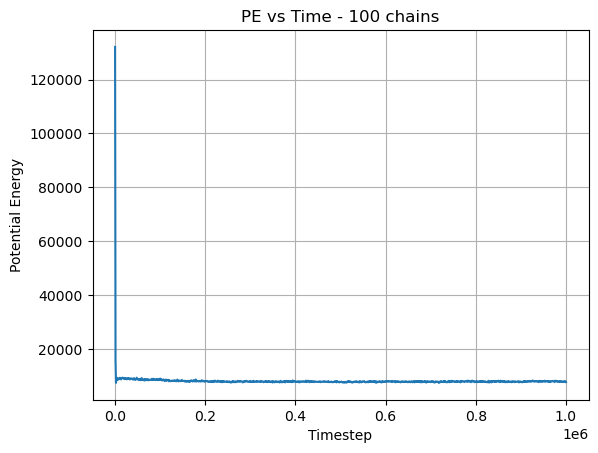

In [6]:
plt.plot(timesteps, PE)
plt.xlabel("Timestep")
plt.ylabel("Potential Energy")
plt.title("PE vs Time - 100 chains")
plt.grid(True)
plt.show()